# ***Setup Environment***

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [2]:
# Pasang kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 98% 761M/775M [00:07<00:00, 57.5MB/s]
100% 775M/775M [00:08<00:00, 100MB/s] 


In [4]:
import zipfile

with zipfile.ZipFile("dog-and-cat-classification-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset_full")

In [5]:
import os
import shutil

# Buat folder target
os.makedirs("dataset/cats", exist_ok=True)
os.makedirs("dataset/dogs", exist_ok=True)

# Folder sumber asli dari dataset
cat_src = "/content/dataset_full/PetImages/Cat"
dog_src = "/content/dataset_full/PetImages/Dog"

# Salin 1000 gambar kucing
for i, file in enumerate(sorted(os.listdir(cat_src))[:1000]):
    src_path = os.path.join(cat_src, file)
    dst_path = f"dataset/cats/cat_{i}.jpg"
    try:
        shutil.copy(src_path, dst_path)
    except:
        continue  # Lewatkan file corrupt

# Salin 1000 gambar anjing
for i, file in enumerate(sorted(os.listdir(dog_src))[:1000]):
    src_path = os.path.join(dog_src, file)
    dst_path = f"dataset/dogs/dog_{i}.jpg"
    try:
        shutil.copy(src_path, dst_path)
    except:
        continue  # Lewatkan file corrupt


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
data_dir = '/content/dataset'  # Lokasi data kamu

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


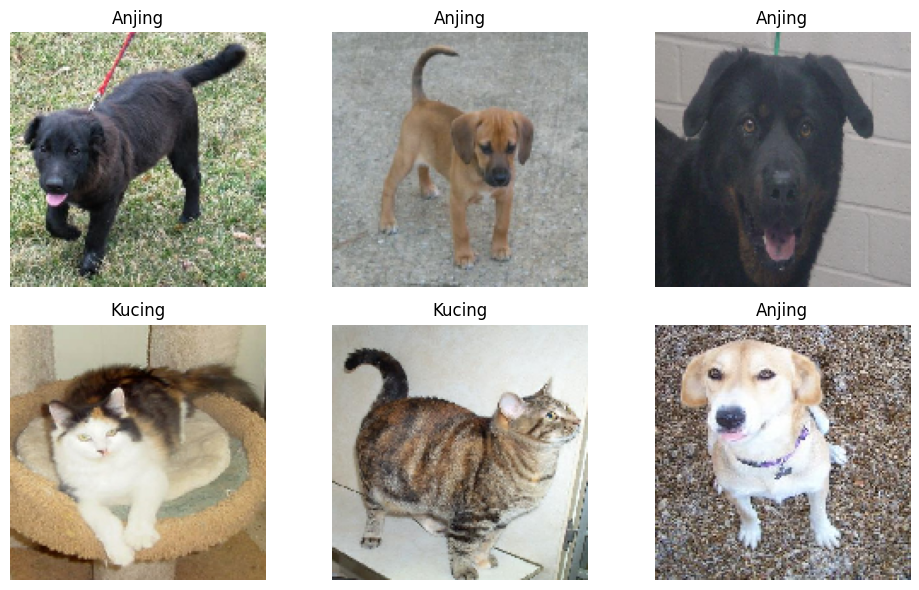

In [8]:
images, labels = next(train_gen)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Anjing" if labels[i] == 1 else "Kucing")
    plt.axis("off")
plt.tight_layout()
plt.show()


# ***Eksperimen CNN (Shallow-Narrow) (Shallow-Wide) (Deep-Narrow) (Deep-Wide)***

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

def train_model(model, name, epochs=15):
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen
    )

    # Simpan model
    model.save(f"{name}.h5")

    return history


***Shallow-Narrow***

In [10]:
def build_shallow_narrow():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model_sn = build_shallow_narrow()
history_sn = train_model(model_sn, "shallow_narrow")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5140 - loss: 1.4710 - val_accuracy: 0.5750 - val_loss: 0.6904
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6183 - loss: 0.6772 - val_accuracy: 0.5850 - val_loss: 0.6669
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6801 - loss: 0.5978 - val_accuracy: 0.6400 - val_loss: 0.6170
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7980 - loss: 0.4644 - val_accuracy: 0.6850 - val_loss: 0.6290
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.8176 - loss: 0.3900 - val_accuracy: 0.6600 - val_loss: 0.7471
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9186 - loss: 0.2263 - val_accuracy: 0.6775 - val_loss: 0.6940
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9540 - loss: 0.1486 - val_accuracy: 0.6750 - val_loss: 0.8483
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9838 - loss: 0.0748 - val_accuracy: 0.6900 - val_loss: 0.

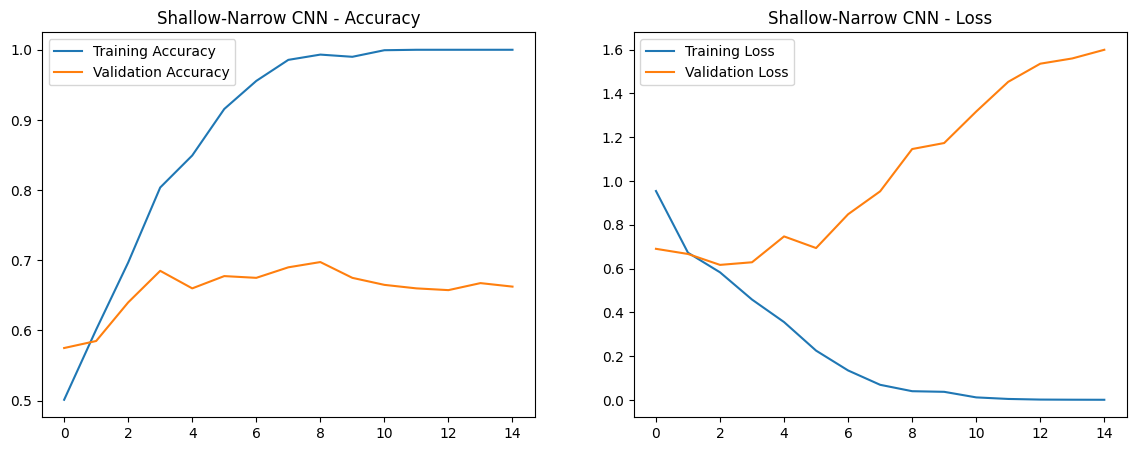

In [13]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# ✅ Baru setelah itu panggil
plot_history(history_sn, "Shallow-Narrow CNN")



***Shallow-Wide***

In [14]:
def build_shallow_wide():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model_sw = build_shallow_wide()
history_sw = train_model(model_sw, "shallow_wide")


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.4947 - loss: 3.7107 - val_accuracy: 0.5575 - val_loss: 0.6916
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6051 - loss: 0.6869 - val_accuracy: 0.5375 - val_loss: 0.6757
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6617 - loss: 0.6301 - val_accuracy: 0.6100 - val_loss: 0.7228
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7670 - loss: 0.5100 - val_accuracy: 0.6100 - val_loss: 0.7679
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.8469 - loss: 0.3525 - val_accuracy: 0.6250 - val_loss: 0.8313
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9198 - loss: 0.2049 - val_accuracy: 0.6300 - val_loss: 1.0095
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9578 - loss: 0.1207 - val_accuracy: 0.6175 - val_loss: 1.2636
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9805 - loss: 0.0647 - val_accuracy: 0.5975 -

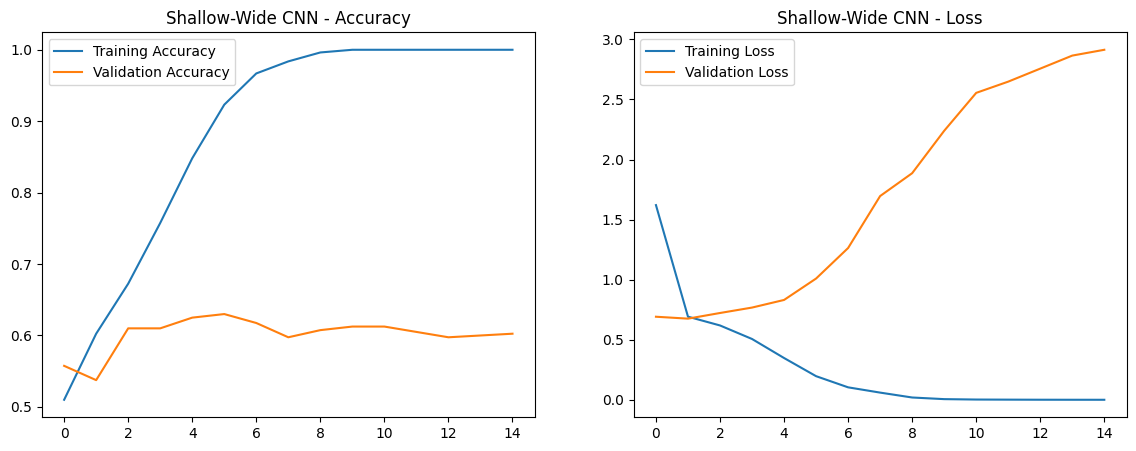

In [15]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# ✅ Baru setelah itu panggil
plot_history(history_sw, "Shallow-Wide CNN")



***Deep-Narrow***

In [16]:
def build_deep_narrow():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model_dn = build_deep_narrow()
history_dn = train_model(model_dn, "deep_narrow")


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.5280 - loss: 0.7095 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5419 - loss: 0.6847 - val_accuracy: 0.6000 - val_loss: 0.6688
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5716 - loss: 0.6736 - val_accuracy: 0.6325 - val_loss: 0.6719
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6506 - loss: 0.6453 - val_accuracy: 0.6650 - val_loss: 0.6405
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6369 - loss: 0.6258 - val_accuracy: 0.6475 - val_loss: 0.6740
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6745 - loss: 0.6099 - val_accuracy: 0.6675 - val_loss: 0.5940
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7539 - loss: 0.5046 - val_accuracy: 0.7050 - val_loss: 0.5784
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7911 - loss: 0.4412 - val_accuracy: 0.7100 - v

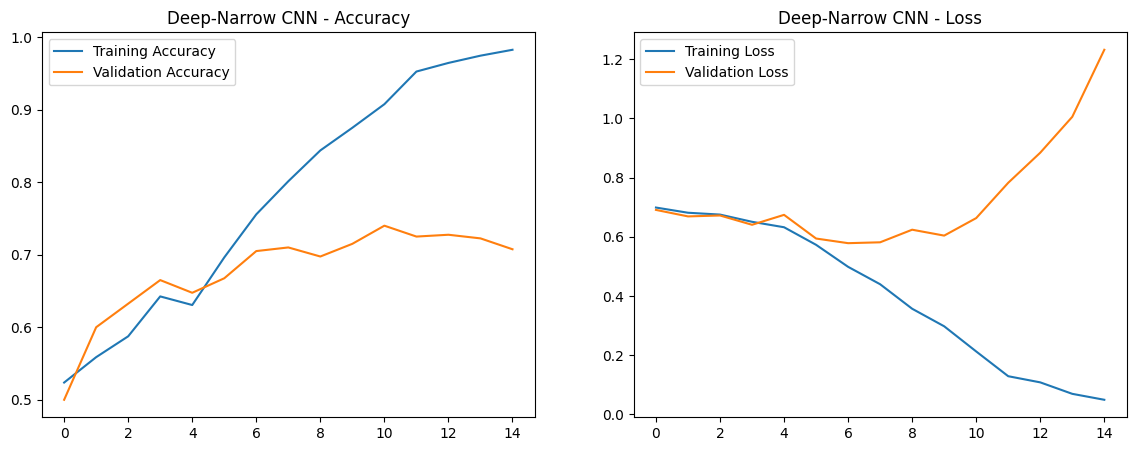

In [17]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# ✅ Baru setelah itu panggil
plot_history(history_dn, "Deep-Narrow CNN")



***Deep-Wide***

In [18]:
def build_deep_wide():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model_dw = build_deep_wide()
history_dw = train_model(model_dw, "deep_wide")


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.5064 - loss: 0.7287 - val_accuracy: 0.5975 - val_loss: 0.6925
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5064 - loss: 0.6936 - val_accuracy: 0.5200 - val_loss: 0.6906
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.5513 - loss: 0.6976 - val_accuracy: 0.5775 - val_loss: 0.6855
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.5897 - loss: 0.6763 - val_accuracy: 0.5000 - val_loss: 0.7046
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5817 - loss: 0.6713 - val_accuracy: 0.5800 - val_loss: 0.6760
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6201 - loss: 0.6439 - val_accuracy: 0.5825 - val_loss: 0.6822
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6993 - loss: 0.5909 - val_accuracy: 0.5800 - val_loss: 0.7363
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6890 - loss: 0.5953 - val_accuracy: 0.6425 -

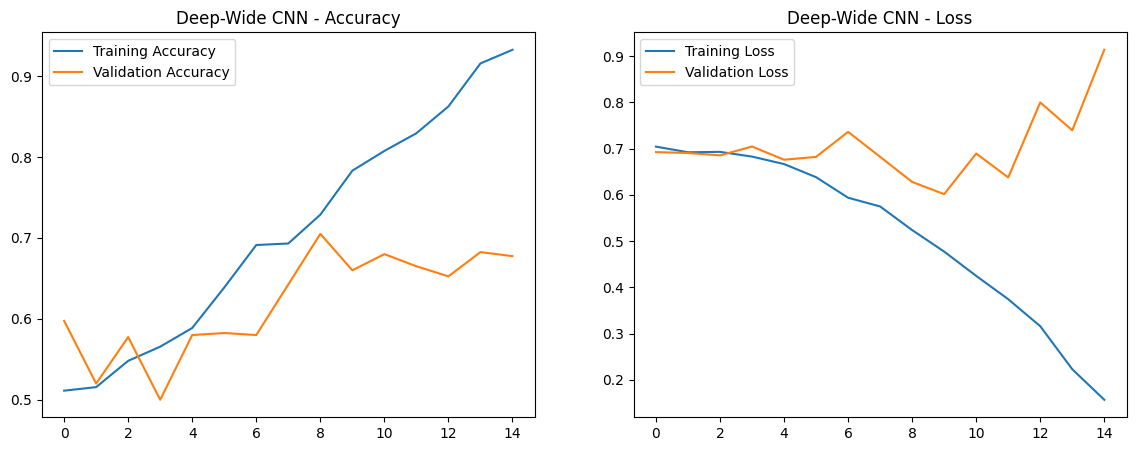

In [19]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# ✅ Baru setelah itu panggil
plot_history(history_dw, "Deep-Wide CNN")



# ***Transfer Learning dengan MobileNetV2***

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [21]:
IMG_SIZE = 160  # MobileNetV2 default input
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    "dataset",  # folder "cats" dan "dogs"
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    "dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [22]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Bekukan semua layer


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [23]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model_tl = Model(inputs=base_model.input, outputs=predictions)


In [24]:
model_tl.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

history_tl = model_tl.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 467ms/step - accuracy: 0.9067 - loss: 0.2370 - val_accuracy: 0.9675 - val_loss: 0.0826
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - accuracy: 0.9627 - loss: 0.0897 - val_accuracy: 0.9750 - val_loss: 0.0659
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.9699 - loss: 0.0635 - val_accuracy: 0.9550 - val_loss: 0.1014
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step - accuracy: 0.9756 - loss: 0.0611 - val_accuracy: 0.9650 - val_loss: 0.0957
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.9811 - loss: 0.0572 - val_accuracy: 0.9525 - val_loss: 0.1034
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - accuracy: 0.9798 - loss: 0.0564 - val_accuracy: 0.9675 - val_loss: 0.0768
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step - accuracy: 0.9786 - loss: 0.0537 - val_accuracy: 0.9600 - val_loss: 0.0936
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accu

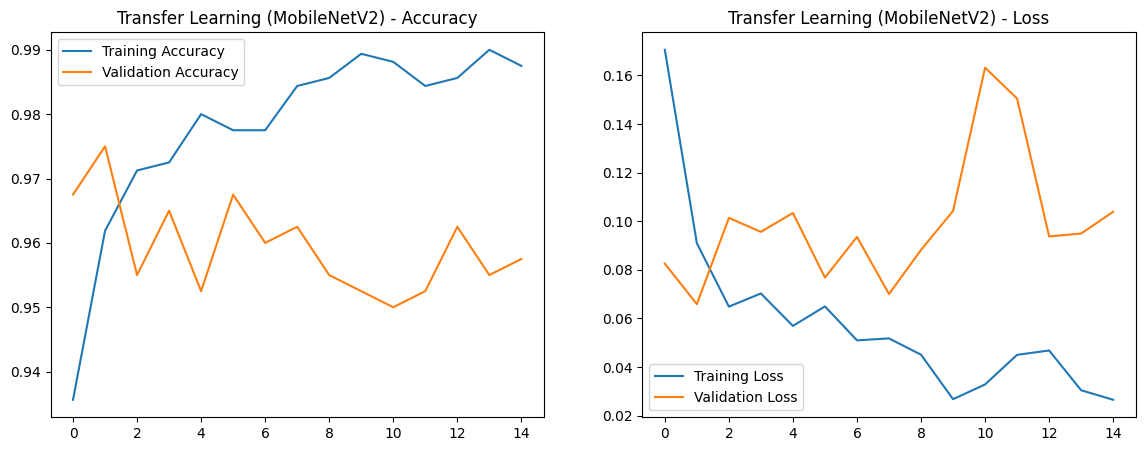

In [25]:
plot_history(history_tl, "Transfer Learning (MobileNetV2)")


In [38]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path ke dataset
cat_dir = '/content/dataset/cats'
dog_dir = '/content/dataset/dogs'

# Variabel penampung
X = []
y = []

# Ukuran gambar target
IMG_SIZE = (150, 150)

X_test_tl = tf.image.resize(X_test, (160, 160))

# Load gambar kucing
for file in sorted(os.listdir(cat_dir)):
    img = load_img(os.path.join(cat_dir, file), target_size=IMG_SIZE)
    img = img_to_array(img) / 255.0  # Normalisasi
    X.append(img)
    y.append(0)

# Load gambar anjing
for file in sorted(os.listdir(dog_dir)):
    img = load_img(os.path.join(dog_dir, file), target_size=IMG_SIZE)
    img = img_to_array(img) / 255.0
    X.append(img)
    y.append(1)

# Convert ke array
X = np.array(X)
y = np.array(y)

print("Total gambar:", len(X))
print("Ukuran gambar:", X.shape[1:])


Total gambar: 2000
Ukuran gambar: (150, 150, 3)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [40]:
from sklearn.metrics import accuracy_score
import numpy as np

def evaluate_model(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi {model_name}: {accuracy:.4f}")


In [41]:
evaluate_model(model_sn, X_test, y_test, "Shallow-Narrow CNN")
evaluate_model(model_sw, X_test, y_test, "Shallow-Wide CNN")
evaluate_model(model_dn, X_test, y_test, "Deep-Narrow CNN")
evaluate_model(model_dw, X_test, y_test, "Deep-Wide CNN")
evaluate_model(model_tl, X_test_tl, y_test, "Transfer Learning (MobileNetV2)")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Akurasi Shallow-Narrow CNN: 0.9250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Akurasi Shallow-Wide CNN: 0.9025
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Akurasi Deep-Narrow CNN: 0.9300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Akurasi Deep-Wide CNN: 0.8950
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step
Akurasi Transfer Learning (MobileNetV2): 0.9875


# ***Prediksi***

Saving images (4).jpg to images (4).jpg


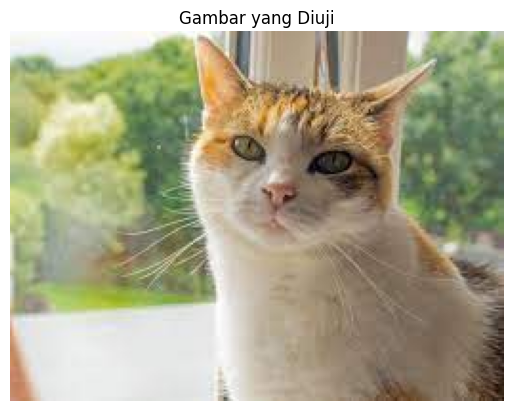

🔍 Hasil Prediksi per Model:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Shallow-Narrow       → Kucing 🐱 (confidence: 0.0027)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Shallow-Wide         → Kucing 🐱 (confidence: 0.0004)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Deep-Narrow          → Kucing 🐱 (confidence: 0.0285)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Deep-Wide            → Kucing 🐱 (confidence: 0.1014)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Transfer Learning    → Kucing 🐱 (confidence: 0.0000)


In [65]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Upload file (langsung dari colab)
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Ambil nama file yang diupload

# Tampilkan gambar
img = Image.open(filename).convert('RGB')
plt.imshow(img)
plt.axis('off')
plt.title("Gambar yang Diuji")
plt.show()

# Resize untuk input CNN (150x150) dan Transfer Learning (160x160)
img_150 = img.resize((150, 150))
img_160 = img.resize((160, 160))

# Normalisasi
img_array_150 = np.array(img_150) / 255.0
img_array_160 = np.array(img_160) / 255.0

# Tambahkan dimensi batch
img_batch_150 = np.expand_dims(img_array_150, axis=0)
img_batch_160 = np.expand_dims(img_array_160, axis=0)

# Fungsi bantu untuk prediksi
def pred_label(prob):
    return "Kucing 🐱" if prob < 0.5 else "Anjing 🐶"

# Prediksi dengan semua model
models = [
    (model_sn, "Shallow-Narrow"),
    (model_sw, "Shallow-Wide"),
    (model_dn, "Deep-Narrow"),
    (model_dw, "Deep-Wide"),
    (model_tl, "Transfer Learning")
]

print("🔍 Hasil Prediksi per Model:\n")

for model, name in models:
    # Pilih input sesuai model
    if name == "Transfer Learning":
        pred = model.predict(img_batch_160)[0][0]
    else:
        pred = model.predict(img_batch_150)[0][0]

    label = pred_label(pred)
    print(f"{name:<20} → {label} (confidence: {pred:.4f})")
